<a href="https://colab.research.google.com/github/BenShieh233/Learn_Python/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd 

from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, roc_curve, auc
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 1.Introduction

In this assignment, we will apply the neural network to predicting the quality of wine. We will firstly use a single-layer neural network model to predict the wine quality, and then we employ a network with two layers to improve our accuracy.

In [4]:
wine = pd.read_csv('/content/sample_data/winequality-red.csv', sep = ';')
# Define good quality as quality > 6
wine['good_quality'] = [0 if i<7 else 1 for i in wine['quality']]

# Split the training and test sets
y = wine['good_quality'].values
X = wine.drop(['good_quality', 'quality'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

In [5]:
# Scale the numerical variables in both training and test data
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## 2. Single-Layer Neural Network

We apply a single-layer neural network 

In [6]:
inputs = keras.Input(shape=(11,))
x = layers.Dense(12, activation="relu", name="dense_1")(inputs)
outputs = layers.Dense(1, activation = "sigmoid", name = "predictions")(x)
quality_nnet = keras.Model(inputs=inputs, outputs=outputs)
quality_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [7]:
quality = quality_nnet.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=50
)

Epoch 1/50
1119/1119 [==============================] - 3s 2ms/step - loss: 0.3838 - accuracy: 0.8409
Epoch 2/50
1119/1119 [==============================] - 2s 2ms/step - loss: 0.3021 - accuracy: 0.8615
Epoch 3/50
1119/1119 [==============================] - 2s 2ms/step - loss: 0.2873 - accuracy: 0.8695
Epoch 4/50
1119/1119 [==============================] - 2s 2ms/step - loss: 0.2800 - accuracy: 0.8695
Epoch 5/50
1119/1119 [==============================] - 2s 2ms/step - loss: 0.2750 - accuracy: 0.8740
Epoch 6/50
1119/1119 [==============================] - 2s 2ms/step - loss: 0.2705 - accuracy: 0.8731
Epoch 7/50
1119/1119 [==============================] - 2s 2ms/step - loss: 0.2674 - accuracy: 0.8767
Epoch 8/50
1119/1119 [==============================] - 2s 2ms/step - loss: 0.2638 - accuracy: 0.8713
Epoch 9/50
1119/1119 [==============================] - 2s 2ms/step - loss: 0.2623 - accuracy: 0.8785
Epoch 10/50
1119/1119 [==============================] - 2s 2ms/step - loss: 0.260

In [8]:
y_preds = quality_nnet.predict(X_test)
y_preds_bin = y_preds > 0.5
table = pd.DataFrame({'True':y_test,'pred':y_preds_bin.T[0]})
table.groupby(['True','pred']).size().unstack('True')

15/15 [==============================] - 0s 2ms/step


True,0,1
pred,,
False,407,29
True,23,21


In [9]:
score = quality_nnet.evaluate(X_test, y_test, verbose = 1)
print(score)

15/15 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8917
[0.2564114034175873, 0.8916666507720947]


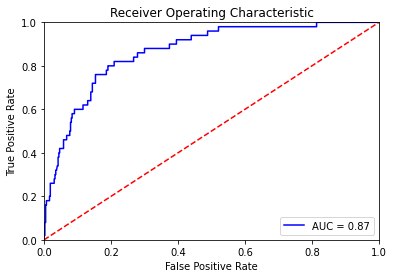

In [10]:
fpr, tpr, threshold = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Deep Learning Neural Network

In [11]:
inputs_DL = keras.Input(shape=(11,))
x = layers.Dense(10, activation="relu", name="dense_1")(inputs_DL)
z = layers.Dense(5, activation="relu", name="dense_2")(x)
outputs_DL = layers.Dense(1, activation="sigmoid", name="predictions")(z)
quality_DL_nnet = keras.Model(inputs=inputs_DL, outputs=outputs_DL)
quality_DL_nnet.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
  # Loss function to minimize
  loss='binary_crossentropy',
  # List of metrics to monitor
  metrics=['accuracy'],
)

In [12]:
quality_DL_nnet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_1 (Dense)             (None, 10)                120       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 predictions (Dense)         (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [13]:
quality_2 = quality_DL_nnet.fit(
    X_train,
    y_train,
    batch_size=1,
    epochs=50,
    validation_split = 0.1
)

Epoch 1/50
1007/1007 [==============================] - 2s 2ms/step - loss: 0.4151 - accuracy: 0.8083 - val_loss: 0.3247 - val_accuracy: 0.8393
Epoch 2/50
1007/1007 [==============================] - 2s 2ms/step - loss: 0.3107 - accuracy: 0.8451 - val_loss: 0.3049 - val_accuracy: 0.8482
Epoch 3/50
1007/1007 [==============================] - 2s 2ms/step - loss: 0.2981 - accuracy: 0.8451 - val_loss: 0.2947 - val_accuracy: 0.8482
Epoch 4/50
1007/1007 [==============================] - 2s 2ms/step - loss: 0.2918 - accuracy: 0.8590 - val_loss: 0.2871 - val_accuracy: 0.8571
Epoch 5/50
1007/1007 [==============================] - 2s 2ms/step - loss: 0.2854 - accuracy: 0.8759 - val_loss: 0.2827 - val_accuracy: 0.8571
Epoch 6/50
1007/1007 [==============================] - 2s 2ms/step - loss: 0.2812 - accuracy: 0.8709 - val_loss: 0.2770 - val_accuracy: 0.8750
Epoch 7/50
1007/1007 [==============================] - 2s 2ms/step - loss: 0.2780 - accuracy: 0.8818 - val_loss: 0.2767 - val_accuracy:

In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [16]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=quality_2.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=quality_2.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [17]:
y_preds_2 = quality_DL_nnet.predict(X_test)
y_preds_2_bin = y_preds_2 > 0.5
table_2 = pd.DataFrame({'True':y_test,'pred':y_preds_2_bin.T[0]})
table_2.groupby(['True','pred']).size().unstack('True')

15/15 [==============================] - 0s 1ms/step


True,0,1
pred,,
False,394,25
True,36,25


In [18]:
score_2 = quality_DL_nnet.evaluate(X_test, y_test, verbose = 1)
print (score_2)

15/15 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.8729
[0.27896931767463684, 0.8729166388511658]


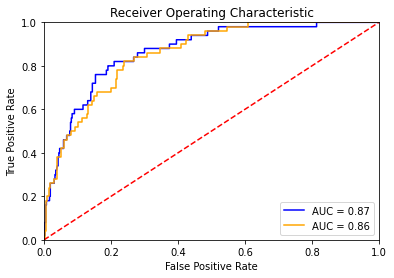

In [23]:
fpr2, tpr2, threshold = roc_curve(y_test, y_preds_2)
roc_auc2 = auc(fpr2, tpr2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'orange', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [2]:
dict_accuracy = {'accuracy':{'Single_layer':0.8917,'Deep_learning':0.8729,'Random_forest':0.9167,'boosted':0.9021, 'CART':0.8646,'Logistics':0.8704,'LDA':0.8661,'QDA':0.8358},'AUC':{'Single_layer':0.87,'Deep_learning':0.86,'Random_forest':0.9188,'boosted':0.9021,'CART':0.8075,'Logistics':0.8777,'LDA':0.8814,'QDA':0.8458}}
accuracy=pd.DataFrame(dict_accuracy)
accuracy

,accuracy,AUC
Single_layer,0.8917,0.8700
Deep_learning,0.8729,0.8600
Random_forest,0.9167,0.9188
boosted,0.9021,0.9021
CART,0.8646,0.8075
Logistics,0.8704,0.8777
LDA,0.8661,0.8814
QDA,0.8358,0.8458
